# Q1

$D_{KL}(P \mid\mid Q) := \sum_{i=1}^n p_i \log \frac{p_i}{q_i} = -\sum p_i \log \frac{q_i}{p_i}$.

Since $\log$ is concave, the negative function is convex, and Jensen's inequality/definition of convexity gives us that the weighted sum of $\log$ is greater than $\log$ of the weighted sum. So we have:

$-\sum p_i \log \frac{q_i}{p_i} \geq -\log \sum p_i \frac{q_i}{p_i} = -\log \sum q_i = - \log 1 = 0$.

# Q2

## (a)

In [242]:
import pandas as pd
import numpy as np

In [308]:
q2hw5_orig = pd.read_csv('hw5.dat', sep='\s+', header=None, skiprows=1)
q2hw5 = q2hw5[[0, 1]]

In [244]:
q2hw5.head()

,0,1
0,-7.496654,0.913425
1,-10.844898,-7.553523
2,-4.543377,-2.135686
3,-1.913821,-0.034780
4,1.771335,0.634508


In [245]:
import random

q2_initial_pts = []

for i in range(5):
    q2_initial_pts.append(random.sample(range(0, q2hw5.shape[0] + 1), 3))
print(q2_initial_pts)

[[744, 1328, 1187], [39, 1051, 404], [137, 1308, 572], [513, 642, 449], [307, 1183, 1202]]


In [246]:
for ip in initial_pts:
    print(q2hw5.iloc[ip])

             0         1
281  -7.585680 -5.341312
1277  1.171027  0.352447
1082 -9.161177 -5.303399
            0         1
553 -9.292506 -5.640008
414 -9.513388 -5.596951
141 -6.536731 -1.705703
             0         1
1258 -4.039874 -2.023093
946  -3.499392  5.520033
647   2.514191  0.934464
            0         1
931  0.026545 -3.091618
417 -7.700572 -1.429862
22  -2.549263 -0.260671
             0         1
700  -4.179541  1.478323
1489 -4.505562  0.073178
641  -6.964732  3.645100


In [247]:
from sklearn import cluster

In [248]:
import matplotlib.pyplot as plt

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


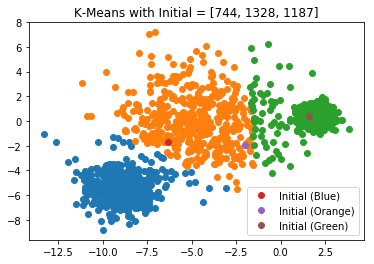

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


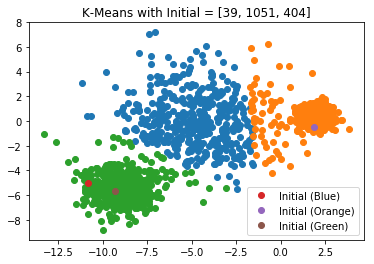

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


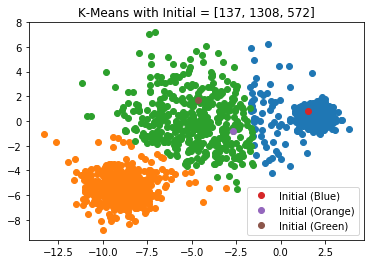

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


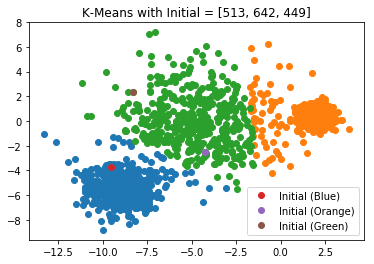

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


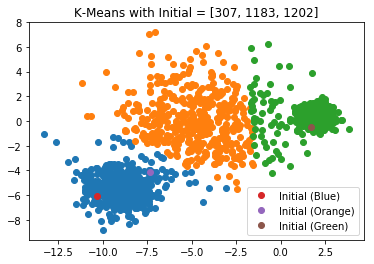

In [273]:
for set_pts in q2_initial_pts:
    kma = cluster.KMeans(n_clusters = 3, init = q2hw5.iloc[set_pts])
    label_predict = kma.fit_predict(q2hw5)
    
    for c in range(3):
        cindex = np.where(label_predict == c)
        plt.plot(q2hw5.iloc[cindex][0], q2hw5.iloc[cindex][1], 'o', label='_nolegend_')
        
    plt.plot(q2hw5.iloc[set_pts[0]][0], q2hw5.iloc[set_pts[0]][1], 'o', label="Initial (Blue)")
    plt.plot(q2hw5.iloc[set_pts[1]][0], q2hw5.iloc[set_pts[1]][1], 'o', label="Initial (Orange)")
    plt.plot(q2hw5.iloc[set_pts[2]][0], q2hw5.iloc[set_pts[2]][1], 'o', label="Initial (Green)")
    plt.legend()
    plt.title("K-Means with Initial = " + str(set_pts))
    plt.show()

In [60]:
from sklearn import mixture

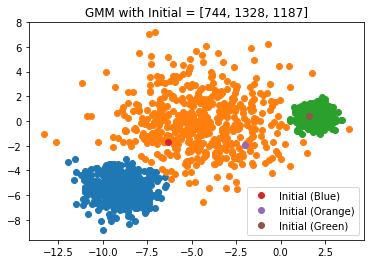

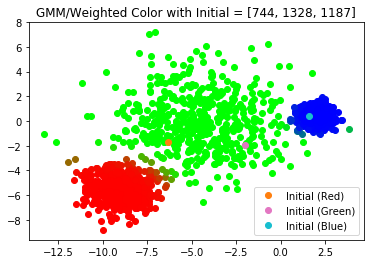

Weights: [0.33087388 0.33606764 0.33305848]
Means: [[-8.95851653 -5.48377849]
 [-4.50588045 -0.10291289]
 [ 1.92208207  0.4553578 ]]
Covariances: [0.98061251 5.84254162 0.23885667]


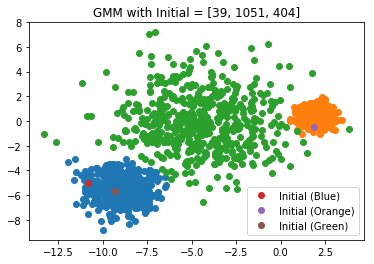

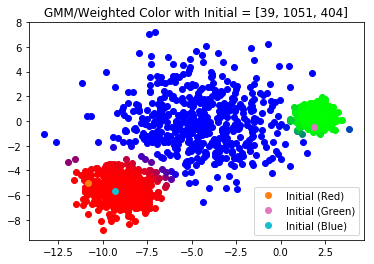

Weights: [0.32984041 0.33276017 0.33739943]
Means: [[-8.96079205 -5.48754084]
 [ 1.92237235  0.45595913]
 [-4.51189747 -0.11581616]]
Covariances: [0.97431631 0.23806831 5.89076031]


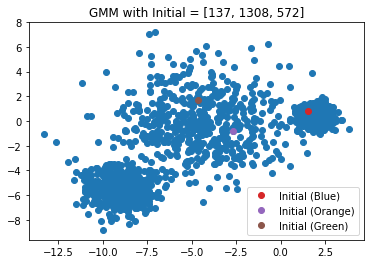

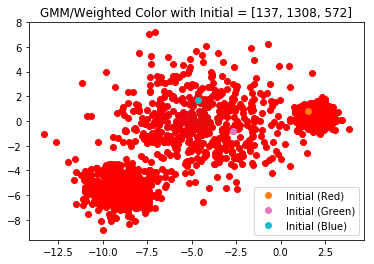

Weights: [0.99115888 0.00293826 0.00590286]
Means: [[-3.82898041 -1.71522227]
 [-4.34343788  0.26128002]
 [-5.14392608  0.32630123]]
Covariances: [15.98056576  1.07948339  1.75431163]


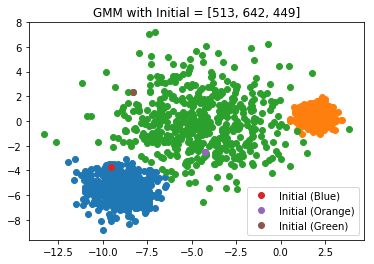

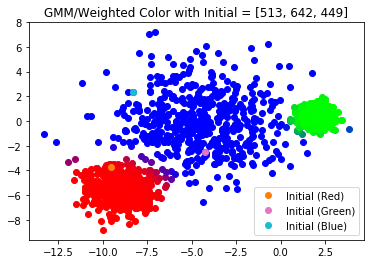

Weights: [0.33099306 0.33284878 0.33615816]
Means: [[-8.95819574 -5.48318747]
 [ 1.92236576  0.4557746 ]
 [-4.50088849 -0.10165146]]
Covariances: [0.98153262 0.23829822 5.84724269]


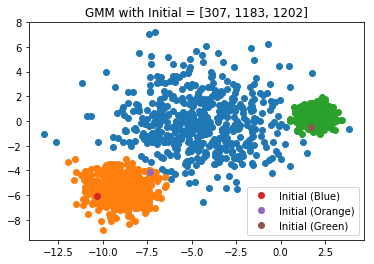

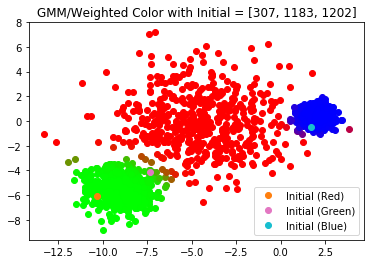

Weights: [0.3368831  0.33035115 0.33276575]
Means: [[-4.50642555 -0.10956469]
 [-8.95963874 -5.48560311]
 [ 1.92240812  0.4559418 ]]
Covariances: [5.87292088 0.97751059 0.23808375]


In [306]:
for set_pts in q2_initial_pts:
    gmm = GaussianMixture(n_components=3, means_init = q2hw5.iloc[set_pts],
                          weights_init = [1/3, 1/3, 1/3], covariance_type = 'spherical')
    label_predict = gmm.fit_predict(q2hw5)
    
    for c in range(3):
        cindex = np.where(label_predict == c)
        plt.plot(q2hw5.iloc[cindex][0], q2hw5.iloc[cindex][1], 'o', label='_nolegend_')
            
    plt.plot(q2hw5.iloc[set_pts[0]][0], q2hw5.iloc[set_pts[0]][1], 'o', label="Initial (Blue)")
    plt.plot(q2hw5.iloc[set_pts[1]][0], q2hw5.iloc[set_pts[1]][1], 'o', label="Initial (Orange)")
    plt.plot(q2hw5.iloc[set_pts[2]][0], q2hw5.iloc[set_pts[2]][1], 'o', label="Initial (Green)")    

    plt.legend()
    plt.title("GMM with Initial = " + str(set_pts))
    plt.show()
    
    predict_prob = gmm.predict_proba(q2hw5)
    
    for i in range(q2hw5.shape[0]):
        plt.plot(q2hw5.iloc[i][0], q2hw5.iloc[i][1], 'o', color = predict_prob[i], label='_nolegend_')
        
    plt.plot(q2hw5.iloc[set_pts[0]][0], q2hw5.iloc[set_pts[0]][1], 'o', color = 'C1', label="Initial (Red)")
    plt.plot(q2hw5.iloc[set_pts[1]][0], q2hw5.iloc[set_pts[1]][1], 'o', color = 'C6', label="Initial (Green)")
    plt.plot(q2hw5.iloc[set_pts[2]][0], q2hw5.iloc[set_pts[2]][1], 'o', color = 'C9', label="Initial (Blue)")  
    
    plt.legend()
    plt.title("GMM/Weighted Color with Initial = " + str(set_pts))
    plt.show()
    
    print("Weights: " + str(gmm.weights_))
    print("Means: " + str(gmm.means_))
    print("Covariances: " + str(gmm.covariances_))


## (c)

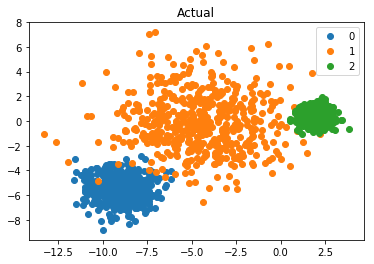

In [312]:
plt.plot(q2hw5_orig[q2hw5_orig[2] == 0][0], q2hw5_orig[q2hw5_orig[2] == 0][1], 'o', label="0")
plt.plot(q2hw5_orig[q2hw5_orig[2] == 1][0], q2hw5_orig[q2hw5_orig[2] == 1][1], 'o', label="1")
plt.plot(q2hw5_orig[q2hw5_orig[2] == 2][0], q2hw5_orig[q2hw5_orig[2] == 2][1], 'o', label="2")
plt.legend()
plt.title("Actual")
plt.show()

Above we've plotted the actual data points by label. It's clear that EM does much better at capturing the fact that the (1) cluster has much higher variance, and as such is scattered across the range, while the (0) and (2) clusters have rather small variance. In K-Means, this is not really captured, since the algorithm does best as simply separating the data into what seem like linearly separable clusters.

# Q3

## (a)

In [73]:
geyser = pd.read_csv('geyser.csv')
geyser = geyser[["eruptions", "waiting"]]

In [78]:
geyser.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [77]:
import random

q3_initial_pts = []

for i in range(5):
    q3_initial_pts.append(random.sample(range(0, geyser.shape[0] + 1), 2))
print(q3_initial_pts)

[[85, 33], [242, 126], [220, 72], [267, 253], [109, 210]]


C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


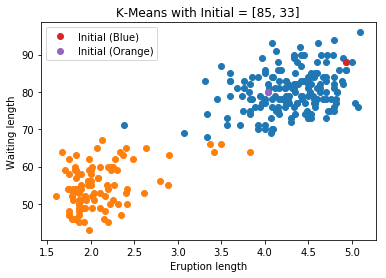

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


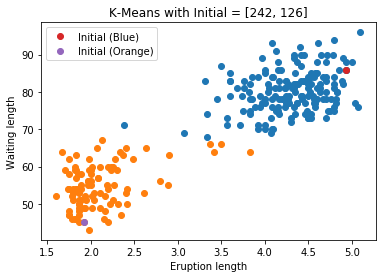

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


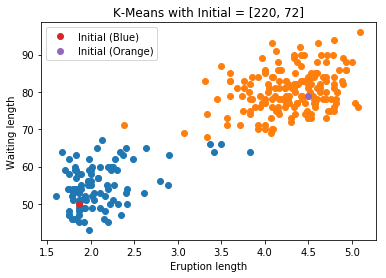

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


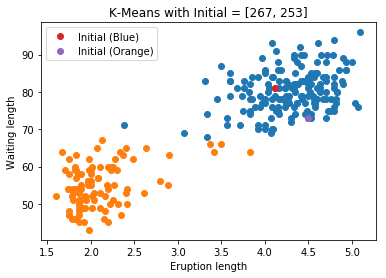

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


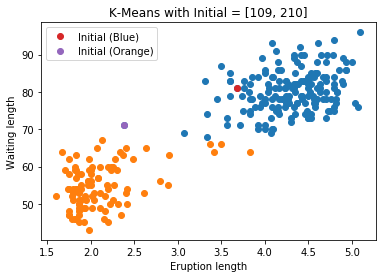

In [313]:
for set_pts in q3_initial_pts:
    kma = cluster.KMeans(n_clusters = 2, init = geyser.iloc[set_pts])
    label_predict = kma.fit_predict(geyser)
    
    for c in range(3):
        cindex = np.where(label_predict == c)
        plt.plot(geyser.iloc[cindex]["eruptions"], geyser.iloc[cindex]["waiting"], 'o', label='_nolegend_')
    
    plt.plot(geyser.iloc[set_pts[0]][0], geyser.iloc[set_pts[0]][1], 'o', label="Initial (Blue)")
    plt.plot(geyser.iloc[set_pts[1]][0], geyser.iloc[set_pts[1]][1], 'o', label="Initial (Orange)")
    plt.xlabel("Eruption length")
    plt.ylabel("Waiting length")
    plt.legend()
    plt.title("K-Means with Initial = " + str(set_pts))
    plt.show()

## (b)

Our clustering seems to suggest that most eruptions at Old Faithful fall into two general categories, one where waiting time is lower (around 50-60 minutes) but eruption time is shorter (1.5-2.5 minutes), and another where waiting time is slightly longer (70-90 minutes) but eruption time is much longer (4-5 minutes). So if Old Faithful isn't erupting as fast as expected, be patient - that's a good thing!

# Q4

## (a)

In [314]:
iris = pd.read_csv("iris.csv", header=None)
iris.columns=('Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)', 'Species')


In [315]:
iris.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [317]:
irisul = iris[['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)']]
print(irisul.head())

   Sepal length (cm)  Sepal width (cm)  Petal length (cm)  Petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


C:\Users\Adam Chang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


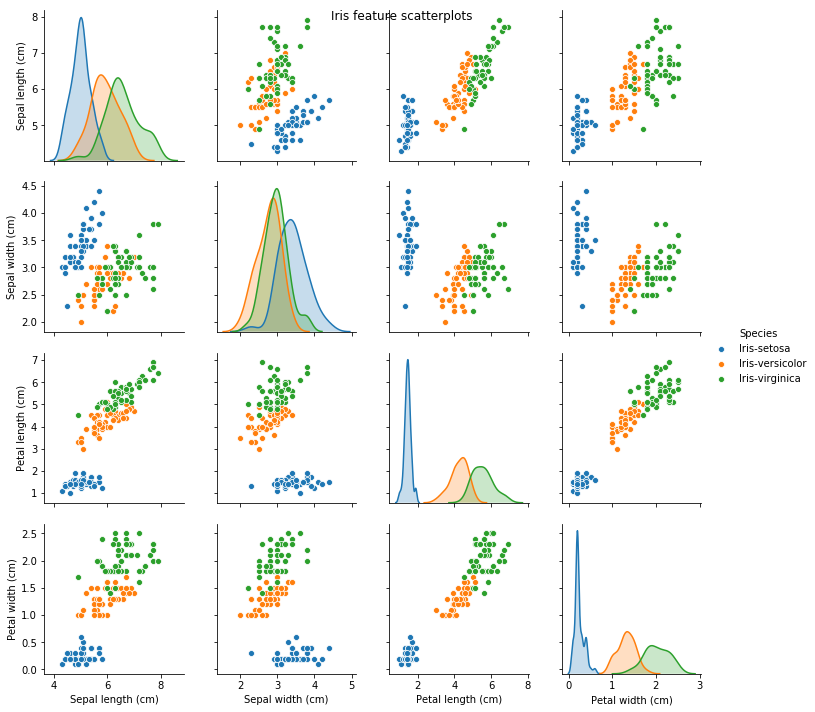

In [321]:
import seaborn as sns

scatter = sns.pairplot(iris, hue='Species')
scatter.fig.suptitle('Iris feature scatterplots')
plt.show()

These plots show that along petal width and petal length, the clusters separate well (i.e., setosa have small, versicolor have medium, and virginica have large). Sepal width doesn't separate the species well, and sepal length does a mediocre job at separating the pieces. Generally, setosa are set apart by having small petal width and length, and versicolor generally have smaller petal width and length than virginica.

## (b)

In [115]:
import random

q4_initial_pts = []

for i in range(5):
    q4_initial_pts.append(random.sample(range(0, iris.shape[0] + 1), 3))
print(q4_initial_pts)

[[100, 76, 71], [18, 30, 42], [84, 136, 126], [26, 3, 15], [33, 29, 116]]


C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


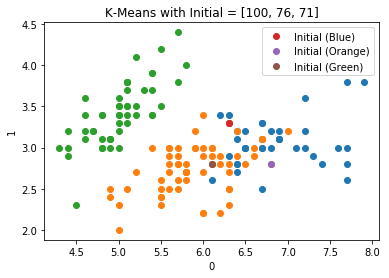

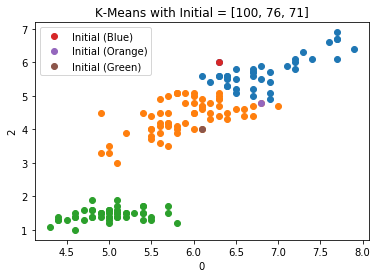

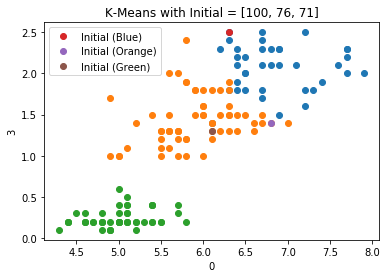

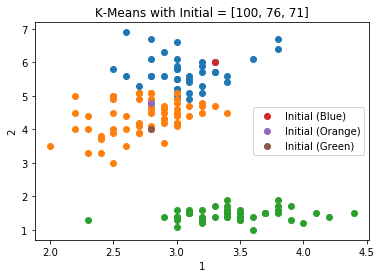

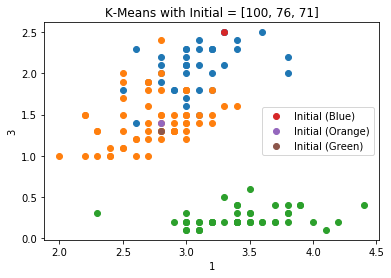

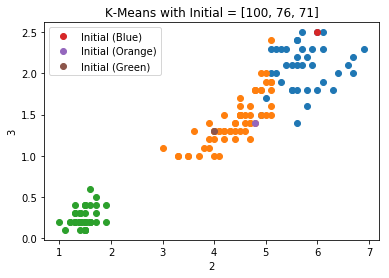

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


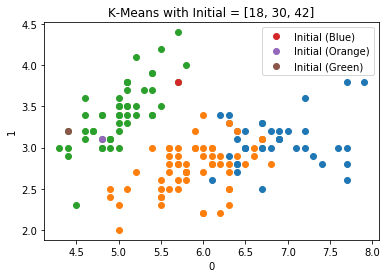

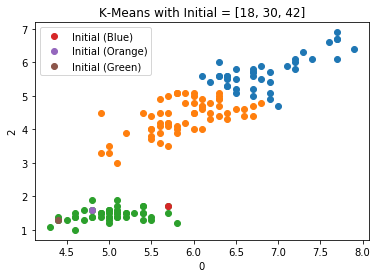

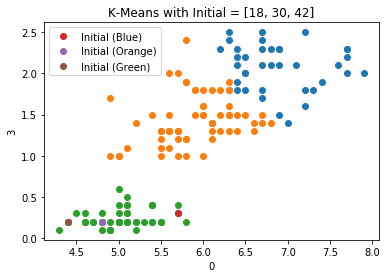

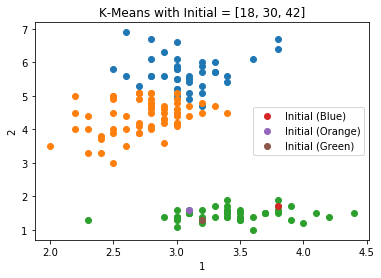

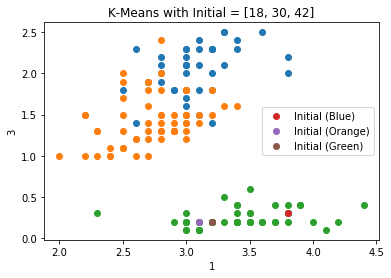

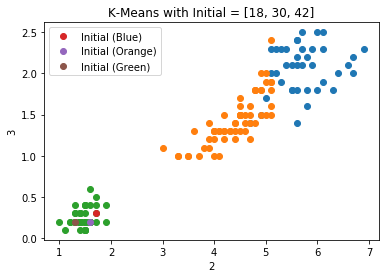

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


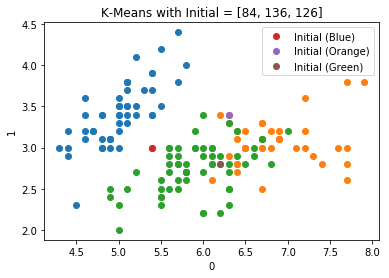

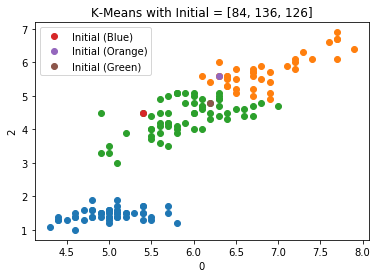

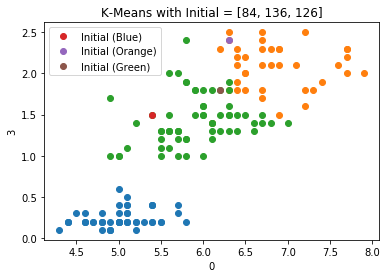

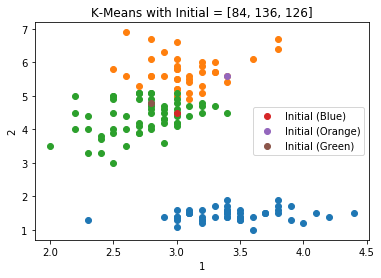

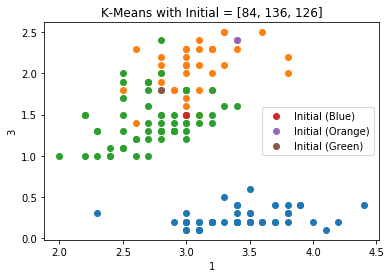

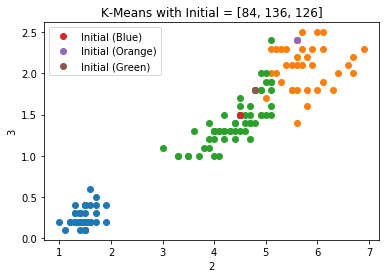

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


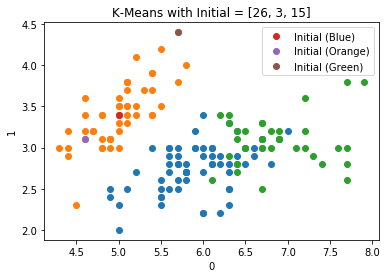

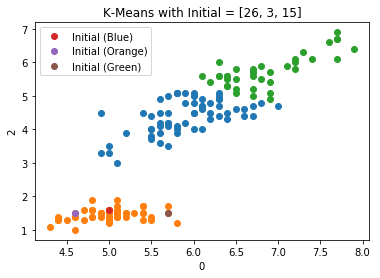

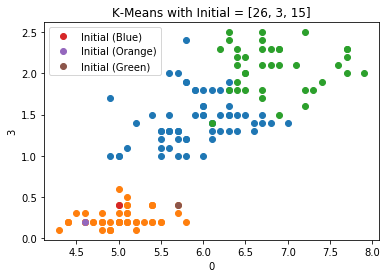

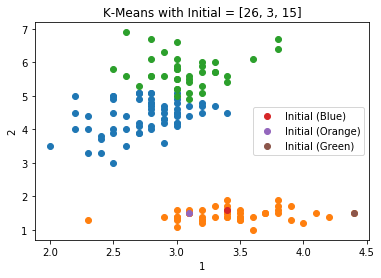

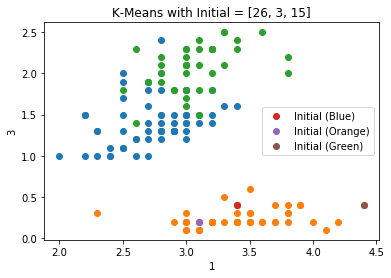

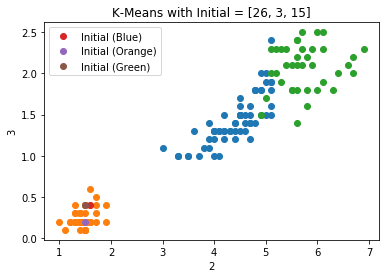

C:\Users\Adam Chang\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:968: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


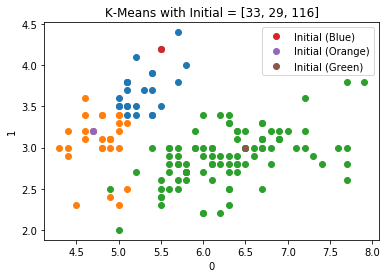

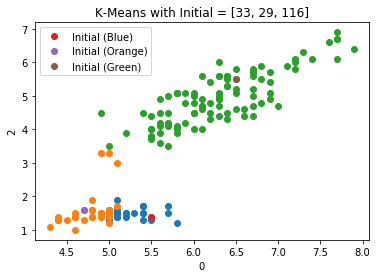

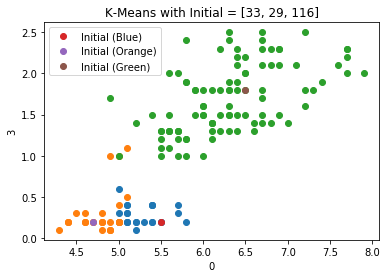

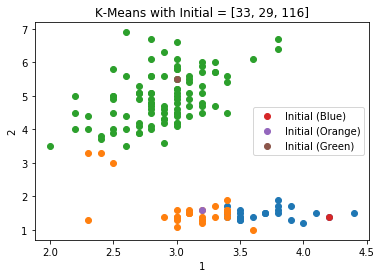

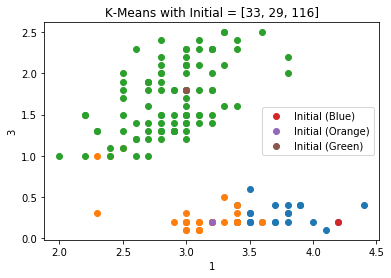

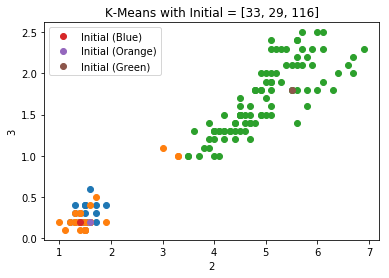

In [284]:
for set_pts in q4_initial_pts:
    kma = cluster.KMeans(n_clusters = 3, init = irisul.iloc[set_pts])
    label_predict = kma.fit_predict(irisul)
    
    for i in list(combinations(range(4), 2)):
        for c in range(3):
            cindex = np.where(label_predict == c)
            plt.plot(irisul.iloc[cindex][i[0]], irisul.iloc[cindex][i[1]], 'o', label='_nolegend_')
        
        
        plt.plot(irisul.iloc[set_pts[0]][i[0]], irisul.iloc[set_pts[0]][i[1]], 'o', label="Initial (Blue)")
        plt.plot(irisul.iloc[set_pts[1]][i[0]], irisul.iloc[set_pts[1]][i[1]], 'o', label="Initial (Orange)")
        plt.plot(irisul.iloc[set_pts[2]][i[0]], irisul.iloc[set_pts[2]][i[1]], 'o', label="Initial (Green)")

        plt.legend()
        plt.xlabel(i[0])
        plt.ylabel(i[1])
        plt.title("K-Means with Initial = " + str(set_pts))
        plt.show()

The K-Means algorithm is quite adept at clustering our species, seemingly regardless of where initial means are (there is an exception, with initial points [33,29,116], where the setosa cluster is mistakenly treated as two clusters, and the versicolor/virginica clusters are merged).. The K-Means algorithm, of course, is not perfect at separating the versicolor and virginica clusters, since they can be quite similar in many of the features.

## (b)

In [285]:
hierclus = cluster.AgglomerativeClustering(n_clusters = 3, linkage = "complete", affinity = "euclidean")

In [286]:
hierclus.fit(irisul)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [287]:
dend_labels = []

for i in range(150):
    dend_labels.append(iris.iloc[i,4].split("-")[-1] + "(" + str(i) + ")")

In [288]:
def iris_coloring(label):
    iris_t = label.split("(")[0]
    
    if iris_t == "setosa":
        return 'C0'
    
    elif iris_t == "versicolor":
        return 'C1'
    
    else:
        return 'C2'

In [289]:
n_type_iris = {}

for i in range(150):
    iris_t = iris.iloc[i,4].split("-")[-1]
    
    if iris_t == "setosa":
        n_type_iris[i] = (1,0,0)
    
    elif iris_t == "versicolor":
        n_type_iris[i] = (0,1,0)
    
    else:
        n_type_iris[i] = (0,0,1)

In [290]:
import operator
for i in range(149):
    n_type_iris[150 + i] = tuple(map(operator.add, n_type_iris[Z[i][0]], n_type_iris[Z[i][1]]))

In [291]:
def color_func(n):
    types_n = n_type_iris[n]
    
    if np.argmax(types_n) == 0:
        return 'C0'
    elif np.argmax(types_n) == 1:
        return 'C1'
    else:
        return 'C2'

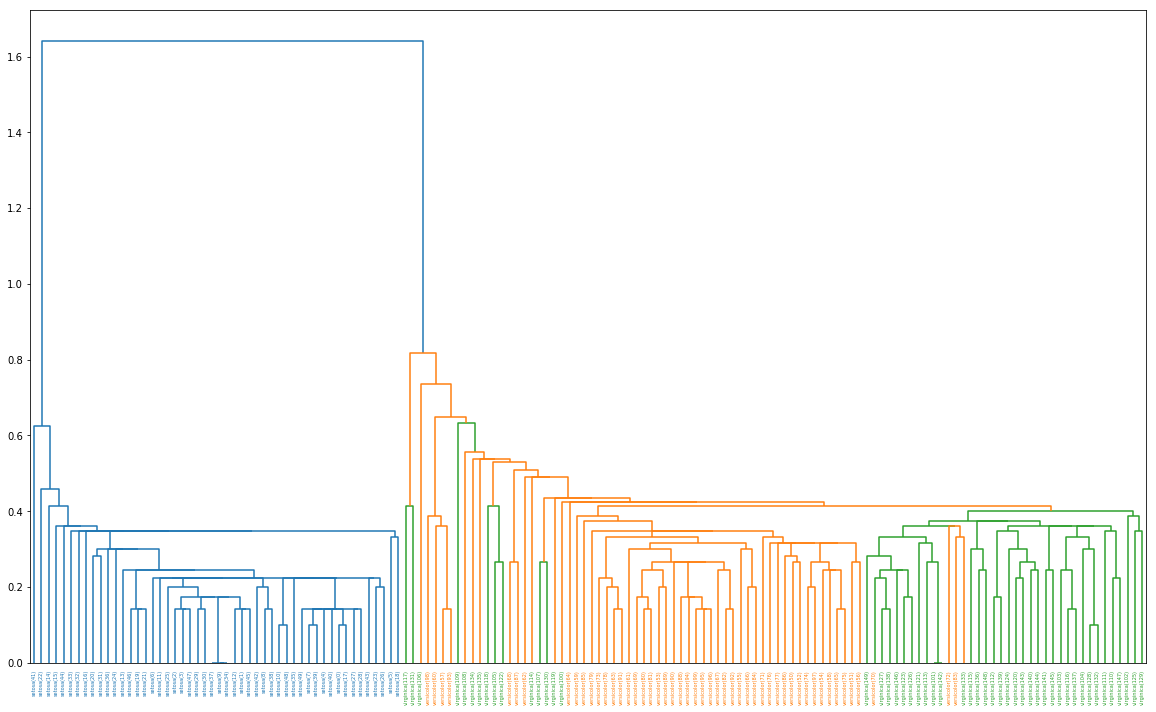

In [292]:
plt.figure(figsize=(20,12))

from scipy.cluster import hierarchy

Z = hierarchy.linkage(irisul)
hierarchy.dendrogram(Z, link_color_func = color_func, labels = dend_labels)

ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for x_label in x_labels:
    x_label.set_color(iris_coloring(x_label.get_text()))

plt.show()

From our tree, it's clear that the setosa species is easily clustered "out" under this algorithm, while the versicolor and virginica clusters are less separated. Specifically, most of the versicolor data points are clustered into their own cluster, as are many of the virginica data, but these clusters are slowly merged with other versicolor/virginica data points AFTER they have been clustered together. Likewise, there were several datapoints in each cluster that did not match the majority of data points' labels for that cluster (i.e., some virginica in versicolor).

## (d)

Both K-Means and hierarchical methods did a good job at clustering the irises. The K-Means algorithm seemed to separate the clusters better, though both did well with the setosa cluster. A drawback to K-Means was that empirically it sometimes treated the setosa cluster as two separate clusters, and then grouped the virginica/versicolor data points altogether.

The K-Means algorithm requires that we know our clusters beforehand, while we can try to interpret it from the dendrogram with some sample data. The dendrogram's mistakes were (while present) rather limited, making interpretation of its clusters both easier and more reliable.